In [41]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123235 sha256=62e910b87009f349ee9f91218ecdefe35a35aefff9b58674f4eb80d2cf669c70
  Stored in directory: /tmp/pip-ephem-wheel-cache-t863pz7y/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos2_nodes.sg",
                      path_links=path_directory + "erdos2_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  6.0
Nb of links :  12
Nb of segmented links :  26.0
Nb of event times :  24


In [2]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


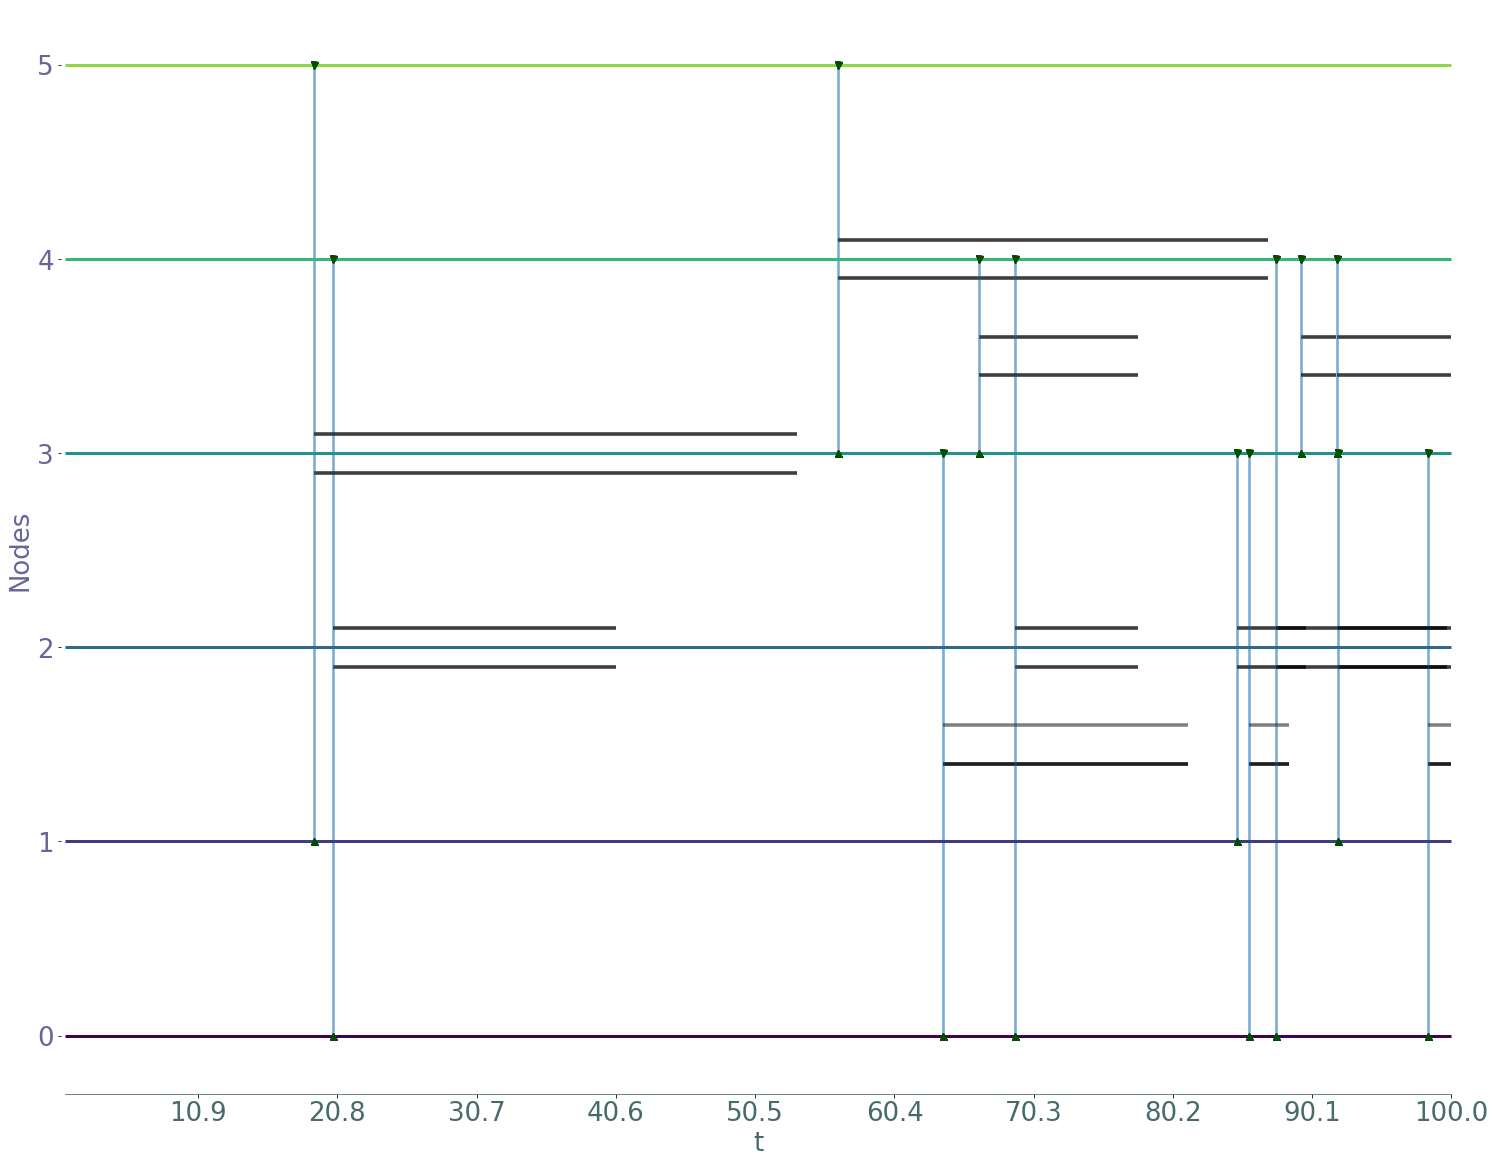

In [3]:
S.plot()

In [4]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [5]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [6]:
events, events_reverse = bt.events_dic(nouveau)

In [7]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [8]:
node = 4

In [9]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [10]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [11]:
lat_triplet[3]

[[40.58872770297745, 63.86340810674349, 2],
 [66.38830461464687, 66.38830461464687, 1],
 [68.97255635957814, 68.97255635957814, 1],
 [77.72417383674939, 77.72417383674939, 1],
 [87.50135191009633, 87.50135191009633, 2],
 [88.45533324390874, 88.45533324390874, 2],
 [89.31168665622316, 89.31168665622316, 1],
 [89.65485288919196, 89.65485288919196, 1],
 [91.77506321968441, 91.77506321968441, 1],
 [91.85091532249051, 91.85091532249051, 1],
 [91.91349174062388, 91.91349174062388, 1],
 [98.33983537120798, 98.33983537120798, 1],
 [99.67299969712721, 99.67299969712721, 1],
 [100.0, 100.0, 1]]

In [12]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

In [13]:
GG.l_nei

{(4, 20.461649616797487): [[20.461649616797487, [0]]],
 (0, 20.461649616797487): [],
 (4, 40.58872770297745): [[40.58872770297745, [0]]],
 (0, 40.58872770297745): [[63.86340810674349, [3]]],
 (3, 66.38830461464687): [[66.38830461464687, [0, 5]]],
 (0, 66.38830461464687): [],
 (4, 68.97255635957814): [[68.97255635957814, [0, 3]]],
 (0, 68.97255635957814): [],
 (4, 77.72417383674939): [[77.72417383674939, [0, 3]]],
 (0, 77.72417383674939): [],
 (4, 87.50135191009633): [[87.50135191009633, [0]]],
 (0, 87.50135191009633): [[87.50135191009633, [3]]],
 (4, 88.45533324390874): [[88.45533324390874, [0]]],
 (0, 88.45533324390874): [[88.45533324390874, [3]]],
 (4, 89.31168665622316): [[89.31168665622316, [0, 3]]],
 (0, 89.31168665622316): [],
 (4, 89.65485288919196): [[89.65485288919196, [0, 3]]],
 (0, 89.65485288919196): [],
 (4, 91.77506321968441): [[91.77506321968441, [0, 3]]],
 (0, 91.77506321968441): [],
 (4, 91.85091532249051): [[91.85091532249051, [0, 3]]],
 (0, 91.85091532249051): [],
 (

In [14]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (3, 86.96128165180458)

In [15]:
GT[(86.96128165180458 ,87.50135191009633)].graph[(3, 86.96128165180458)]

KeyError: (3, 86.96128165180458)

In [16]:
cur_best[4]

{1.4283931450178033: (-inf, inf),
 19.103743355771396: (-inf, inf),
 20.461649616797487: (20.461649616797487, 0),
 40.58872770297745: (40.58872770297745, 0),
 53.497400780719815: (-inf, inf),
 56.35241885637825: (-inf, inf),
 63.86340810674349: (-inf, inf),
 66.38830461464687: (66.38830461464687, 0),
 68.97255635957814: (68.97255635957814, 0),
 77.72417383674939: (77.72417383674939, 0),
 81.27165555658776: (-inf, inf),
 84.75277347981506: (-inf, inf),
 85.60191459824773: (-inf, inf),
 86.96128165180458: (-inf, inf),
 87.50135191009633: (87.50135191009633, 0),
 88.45533324390874: (88.45533324390874, 0),
 89.31168665622316: (89.31168665622316, 0),
 89.65485288919196: (89.65485288919196, 0),
 91.77506321968441: (91.77506321968441, 0),
 91.85091532249051: (91.85091532249051, 0),
 91.91349174062388: (91.91349174062388, 0),
 98.33983537120798: (98.33983537120798, 0),
 99.67299969712721: (99.67299969712721, 0),
 100.0: (100.0, 0)}

In [17]:
pre[0]

{1.4283931450178033: {},
 19.103743355771396: {},
 20.461649616797487: {(4, 20.461649616797487): (20.461649616797487,
   20.461649616797487)},
 40.58872770297745: {(4, 40.58872770297745): (20.461649616797487,
   40.58872770297745)},
 53.497400780719815: {},
 56.35241885637825: {},
 63.86340810674349: {},
 66.38830461464687: {(3, 66.38830461464687): (63.86340810674349,
   66.38830461464687)},
 68.97255635957814: {(4, 68.97255635957814): (68.97255635957814,
   68.97255635957814)},
 77.72417383674939: {(4, 77.72417383674939): (68.97255635957814,
   77.72417383674939)},
 81.27165555658776: {},
 84.75277347981506: {},
 85.60191459824773: {},
 86.96128165180458: {},
 87.50135191009633: {(4, 87.50135191009633): (87.50135191009633,
   87.50135191009633)},
 88.45533324390874: {(4, 88.45533324390874): (87.50135191009633,
   88.45533324390874)},
 89.31168665622316: {(4, 89.31168665622316): (88.45533324390874,
   89.31168665622316)},
 89.65485288919196: {(4, 89.65485288919196): (89.31168665622316,

In [18]:
nouveau.link_presence[2]

[66.38830461464687,
 68.97255635957814,
 68.97255635957814,
 77.72417383674939,
 89.31168665622316,
 89.65485288919196,
 89.65485288919196,
 91.77506321968441,
 91.85091532249051,
 91.91349174062388,
 91.91349174062388,
 98.33983537120798,
 98.33983537120798,
 99.67299969712721,
 99.67299969712721,
 100.0]

In [19]:
edge = bt.edges(nouveau)

In [20]:
edge[0][3]

{63.86340810674349: (63.86340810674349, 63.86340810674349),
 66.38830461464687: (63.86340810674349, 66.38830461464687),
 68.97255635957814: (66.38830461464687, 68.97255635957814),
 77.72417383674939: (68.97255635957814, 77.72417383674939),
 81.27165555658776: (77.72417383674939, 81.27165555658776),
 85.60191459824773: (85.60191459824773, 85.60191459824773),
 86.96128165180458: (85.60191459824773, 86.96128165180458),
 87.50135191009633: (86.96128165180458, 87.50135191009633),
 88.45533324390874: (87.50135191009633, 88.45533324390874),
 98.33983537120798: (98.33983537120798, 98.33983537120798),
 99.67299969712721: (98.33983537120798, 99.67299969712721),
 100.0: (99.67299969712721, 100.0)}

In [21]:
edge[3][4]

{66.38830461464687: (66.38830461464687, 66.38830461464687),
 68.97255635957814: (66.38830461464687, 68.97255635957814),
 77.72417383674939: (68.97255635957814, 77.72417383674939),
 89.31168665622316: (89.31168665622316, 89.31168665622316),
 89.65485288919196: (89.31168665622316, 89.65485288919196),
 91.77506321968441: (89.65485288919196, 91.77506321968441),
 91.85091532249051: (91.85091532249051, 91.85091532249051),
 91.91349174062388: (91.85091532249051, 91.91349174062388),
 98.33983537120798: (91.91349174062388, 98.33983537120798),
 99.67299969712721: (98.33983537120798, 99.67299969712721),
 100.0: (99.67299969712721, 100.0)}

In [22]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

4 0 20.461649616797487 -1 -1 -1 -1
edge after 20.461649616797487 40.58872770297745
t1p,t2p 20.461649616797487 20.461649616797487
4 0 40.58872770297745 -1 -1 -1 -1
t1p,t2p 20.461649616797487 40.58872770297745
0 3 40.58872770297745 20.461649616797487 40.58872770297745 -2 -1
edge after 63.86340810674349 66.38830461464687
t1p,t2p 63.86340810674349 63.86340810674349
4 0 68.97255635957814 -1 -1 -1 -1
edge after 68.97255635957814 77.72417383674939
t1p,t2p 68.97255635957814 68.97255635957814
4 3 68.97255635957814 68.97255635957814 68.97255635957814 68.97255635957814 77.72417383674939
edge after 68.97255635957814 77.72417383674939
t1p,t2p 66.38830461464687 68.97255635957814
3 5 68.97255635957814 68.97255635957814 68.97255635957814 68.97255635957814 77.72417383674939
edge after 68.97255635957814 77.72417383674939
t1p,t2p 66.38830461464687 68.97255635957814
4 0 77.72417383674939 -1 -1 -1 -1
t1p,t2p 68.97255635957814 77.72417383674939
4 3 77.72417383674939 68.97255635957814 77.72417383674939 -2 -1

In [23]:
for e in G.graph[(3,77.72417383674939)]:
    print(e)

(1, 84.75277347981506)
(1, 85.60191459824773)
(1, 86.96128165180458)
(5, 77.72417383674939)
(5, 81.27165555658776)
(5, 84.75277347981506)
(5, 85.60191459824773)
(5, 86.96128165180458)


In [24]:
G.graph[(3,77.72417383674939)][(1, 84.75277347981506)]

{'interval': (84.75277347981506, 84.75277347981506)}

In [25]:
G.graph[(3,77.72417383674939)][(5, 84.75277347981506)]

{'interval': (81.27165555658776, 84.75277347981506)}

In [26]:
after[4]

{1.4283931450178033: False,
 19.103743355771396: False,
 20.461649616797487: False,
 40.58872770297745: False,
 53.497400780719815: False,
 56.35241885637825: False,
 63.86340810674349: False,
 66.38830461464687: False,
 68.97255635957814: False,
 77.72417383674939: False,
 81.27165555658776: False,
 84.75277347981506: False,
 85.60191459824773: False,
 86.96128165180458: False,
 87.50135191009633: False,
 88.45533324390874: False,
 89.31168665622316: False,
 89.65485288919196: False,
 91.77506321968441: False,
 91.85091532249051: False,
 91.91349174062388: False,
 98.33983537120798: False,
 99.67299969712721: False,
 100.0: False}

In [27]:
before[4]

{1.4283931450178033: False,
 19.103743355771396: False,
 20.461649616797487: False,
 40.58872770297745: False,
 53.497400780719815: False,
 56.35241885637825: False,
 63.86340810674349: False,
 66.38830461464687: False,
 68.97255635957814: False,
 77.72417383674939: False,
 81.27165555658776: False,
 84.75277347981506: False,
 85.60191459824773: False,
 86.96128165180458: False,
 87.50135191009633: False,
 88.45533324390874: False,
 89.31168665622316: False,
 89.65485288919196: False,
 91.77506321968441: False,
 91.85091532249051: False,
 91.91349174062388: False,
 98.33983537120798: False,
 99.67299969712721: False,
 100.0: False}

In [28]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [29]:
sigma_r

{(0, 1.4283931450178033): vol(0,0),
 (0, 19.103743355771396): vol(0,0),
 (0, 20.461649616797487): vol(1,0),
 (0, 40.58872770297745): vol(1,0),
 (0, 53.497400780719815): vol(1,0),
 (0, 56.35241885637825): vol(1,0),
 (0, 63.86340810674349): vol(1,0),
 (0, 66.38830461464687): vol(1,0),
 (0, 68.97255635957814): vol(1,0),
 (0, 77.72417383674939): vol(1,0),
 (0, 81.27165555658776): vol(1,0),
 (0, 84.75277347981506): vol(1,0),
 (0, 85.60191459824773): vol(1,0),
 (0, 86.96128165180458): vol(1,0),
 (0, 87.50135191009633): vol(1,0),
 (0, 88.45533324390874): vol(1,0),
 (0, 89.31168665622316): vol(1,0),
 (0, 89.65485288919196): vol(1,0),
 (0, 91.77506321968441): vol(1,0),
 (0, 91.85091532249051): vol(1,0),
 (0, 91.91349174062388): vol(1,0),
 (0, 98.33983537120798): vol(1,0),
 (0, 99.67299969712721): vol(1,0),
 (0, 100.0): vol(1,0),
 (1, 1.4283931450178033): vol(0,0),
 (1, 19.103743355771396): vol(0,0),
 (1, 20.461649616797487): vol(0,0),
 (1, 40.58872770297745): vol(0,0),
 (1, 53.497400780719815):

In [30]:
sigma_r[(4, 87.50135191009633)]

vol(1,0)

In [31]:
sigma_r[(4, 66.38830461464687)]

vol(1,0)

In [32]:
sigma_r[(0, 66.38830461464687)]

vol(1,0)

In [33]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [34]:
prev_next[4]

{20.461649616797487: [40.58872770297745,
  66.38830461464687,
  68.97255635957814,
  77.72417383674939,
  87.50135191009633,
  88.45533324390874,
  89.31168665622316,
  89.65485288919196,
  91.77506321968441,
  91.85091532249051,
  91.91349174062388,
  98.33983537120798,
  99.67299969712721,
  100.0],
 40.58872770297745: [20.461649616797487,
  66.38830461464687,
  68.97255635957814,
  77.72417383674939,
  87.50135191009633,
  88.45533324390874,
  89.31168665622316,
  89.65485288919196,
  91.77506321968441,
  91.85091532249051,
  91.91349174062388,
  98.33983537120798,
  99.67299969712721,
  100.0],
 66.38830461464687: [40.58872770297745,
  20.461649616797487,
  68.97255635957814,
  77.72417383674939,
  87.50135191009633,
  88.45533324390874,
  89.31168665622316,
  89.65485288919196,
  91.77506321968441,
  91.85091532249051,
  91.91349174062388,
  98.33983537120798,
  99.67299969712721,
  100.0],
 68.97255635957814: [66.38830461464687,
  40.58872770297745,
  20.461649616797487,
  77.724

In [35]:
contri[4]

{20.461649616797487: (1.4283931450178033, 100.0),
 40.58872770297745: (1.4283931450178033, 100.0),
 66.38830461464687: (1.4283931450178033, 100.0),
 68.97255635957814: (1.4283931450178033, 100.0),
 77.72417383674939: (1.4283931450178033, 100.0),
 87.50135191009633: (1.4283931450178033, 100.0),
 88.45533324390874: (1.4283931450178033, 100.0),
 89.31168665622316: (1.4283931450178033, 100.0),
 89.65485288919196: (1.4283931450178033, 100.0),
 91.77506321968441: (1.4283931450178033, 100.0),
 91.85091532249051: (1.4283931450178033, 100.0),
 91.91349174062388: (1.4283931450178033, 100.0),
 98.33983537120798: (1.4283931450178033, 100.0),
 99.67299969712721: (1.4283931450178033, 100.0),
 100.0: (1.4283931450178033, 100.0)}

In [36]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [37]:
deltasvvt

{(4, 20.461649616797487): vol(0,0),
 (0, 20.461649616797487): vol(0,0),
 (4, 40.58872770297745): vol(0,0),
 (0, 40.58872770297745): vol(0,0),
 (3, 66.38830461464687): vol(0,0),
 (0, 66.38830461464687): vol(0,0),
 (4, 68.97255635957814): vol(0,0),
 (0, 68.97255635957814): vol(0,0),
 (4, 77.72417383674939): vol(0,0),
 (0, 77.72417383674939): vol(0,0),
 (4, 87.50135191009633): vol(0,0),
 (0, 87.50135191009633): vol(0,0),
 (4, 88.45533324390874): vol(0,0),
 (0, 88.45533324390874): vol(0,0),
 (4, 89.31168665622316): vol(0,0),
 (0, 89.31168665622316): vol(0,0),
 (4, 89.65485288919196): vol(0,0),
 (0, 89.65485288919196): vol(0,0),
 (4, 91.77506321968441): vol(0,0),
 (0, 91.77506321968441): vol(0,0),
 (4, 91.85091532249051): vol(0,0),
 (0, 91.85091532249051): vol(0,0),
 (4, 91.91349174062388): vol(0,0),
 (0, 91.91349174062388): vol(0,0),
 (4, 98.33983537120798): vol(0,0),
 (0, 98.33983537120798): vol(0,0),
 (4, 99.67299969712721): vol(0,0),
 (0, 99.67299969712721): vol(0,0),
 (4, 100.0): vol(0

In [38]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

w_tp 5 81.27165555658776 ii 1 partial_sum {86.96128165180458: vol(0,0), 85.60191459824773: vol(0,0), 84.75277347981506: vol(209.70493713076365,0), 81.27165555658776: vol(209.70493713076365,0)}
w_tp 5 81.27165555658776 l_nei[v,t][ii+1][0] 84.75277347981506 partial_sum[l_nei[v,t][ii+1][0]] vol(209.70493713076365,0) (sigma_r[(v,event[jjj])]/sigma_r[(w,t_p)] ) vol(0.28189010655298347,-1) contribution[w][t_p] vol(0,0)


In [39]:
contribution

{0: {20.461649616797487: vol(0,0),
  53.497400780719815: vol(197.7515839474406,0),
  56.35241885637825: vol(197.7515839474406,0),
  63.86340810674349: vol(197.7515839474406,0),
  40.58872770297745: vol(197.7515839474406,0),
  68.97255635957814: vol(0,0),
  77.72417383674939: vol(0,0),
  87.50135191009633: vol(0,0),
  88.45533324390874: vol(0,0),
  89.31168665622316: vol(0,0),
  89.65485288919196: vol(0,0),
  91.77506321968441: vol(0,0),
  91.85091532249051: vol(0,0),
  91.91349174062388: vol(0,0),
  98.33983537120798: vol(0,0),
  99.67299969712721: vol(0,0),
  100.0: vol(0,0),
  66.38830461464687: vol(0,0),
  1.4283931450178033: vol(0,0),
  19.103743355771396: vol(0,0),
  81.27165555658776: vol(0,0),
  84.75277347981506: vol(0,0),
  85.60191459824773: vol(0,0),
  86.96128165180458: vol(0,0)},
 4: {20.461649616797487: vol(0,0),
  40.58872770297745: vol(197.7515839474406,0),
  68.97255635957814: vol(0,0),
  77.72417383674939: vol(209.70493713076365,0),
  87.50135191009633: vol(0,0),
  88

In [40]:
contribution[3]

{63.86340810674349: vol(197.7515839474406,0),
 68.97255635957814: vol(0,0),
 86.96128165180458: vol(0,0),
 85.60191459824773: vol(0,0),
 84.75277347981506: vol(209.70493713076365,0),
 81.27165555658776: vol(209.70493713076365,0),
 77.72417383674939: vol(209.70493713076365,0),
 87.50135191009633: vol(0,0),
 88.45533324390874: vol(0,0),
 89.31168665622316: vol(0,0),
 89.65485288919196: vol(0,0),
 91.77506321968441: vol(0,0),
 91.85091532249051: vol(0,0),
 91.91349174062388: vol(0,0),
 98.33983537120798: vol(0,0),
 99.67299969712721: vol(0,0),
 100.0: vol(0,0),
 66.38830461464687: vol(0,0),
 1.4283931450178033: vol(0,0),
 19.103743355771396: vol(0,0),
 20.461649616797487: vol(0,0),
 40.58872770297745: vol(0,0),
 53.497400780719815: vol(0,0),
 56.35241885637825: vol(0,0)}